<a href="https://colab.research.google.com/github/realyou0312/DataAnalysis/blob/main/%EC%8B%A4%ED%97%98%EC%8B%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install finance-datareader
!pip install ta

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#라이브러리 불러오기
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from math import floor
from termcolor import colored as cl
import FinanceDataReader as fdr
from ta.trend import ADXIndicator, adx, adx_pos , adx_neg

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20,10)

In [ ]:
order_info = pd.read_csv('/content/drive/MyDrive/프로젝트코드/sample.csv', encoding='euc-kr')

## ADX

In [ ]:
def implement_adx_strategy(prices, pdi, ndi, adx):
  buy_price= []
  sell_price = [] 
  adx_signal = []
  signal = 0

  for i in range(len(prices)):
    if adx[i-1] < 25 and adx[i] > 25 and pdi[i] > ndi[i]:
      if signal != 1:
        buy_price.append(prices[i])
        sell_price.append(np.nan)
        singal =1
        adx_signal.append(signal)
      else:
        buy_price.append(np.nan)
        sell_price.append(np.nan)
        adx_signal.append(0)
    elif adx[i-1] <25 and adx[i] >25 and ndi[i] > pdi[i]:
      if signal != -1:
        buy_price.append(np.nan)
        sell_price.append(prices[i])
        signal = -1
        adx_signal.append(signal)
      else:
        buy_price.append(np.nan)
        sell_price.append(np.nan)
        adx_signal.append(0)
    else:
      buy_price.append(np.nan)
      sell_price.append(np.nan)
      adx_signal.append(0)
  
  return buy_price, sell_price, adx_signal

In [ ]:
def ADX_visualization(code, window =14, plot = False):
  buy_date = pd.to_datetime(order_info[(order_info['상품번호'] == '00000A'+code) &
           (order_info['고객번호'] == 'C00010') &
           (order_info['매도매수구분코드']==2)]['주문일자'], format = '%Y%m%d')
  sell_date = pd.to_datetime(order_info[(order_info['상품번호'] == '00000A'+code) &
           (order_info['고객번호'] == 'C00010') &
           (order_info['매도매수구분코드']==1)]['주문일자'], format = '%Y%m%d')
  
  stock = fdr.DataReader(code, '2020-01-05','2020-03-31')
  stock['ADX']= adx(stock['High'],stock['Low'],stock['Close'], window= window)
  stock['PDI'] = adx_pos(stock['High'],stock['Low'],stock['Close'],window= window)
  stock['MDI'] = adx_neg(stock['High'],stock['Low'],stock['Close'],window= window)
  stock = stock.iloc[window+1:,:]
  
  buy_price, sell_price, adx_signal = implement_adx_strategy(stock['Close'], stock['PDI'],stock['MDI'], stock['ADX'])

  if plot == True:
    plt.figure(figsize=(15,7.5))
    ax1 = plt.subplot2grid((11,1),(0,0), rowspan = 5, colspan=1)
    ax2 = plt.subplot2grid((11,1),(6,0), rowspan = 5, colspan=1)
    ax1.plot(stock['Close'], linewidth =2, color = '#ff9800')
    ax1.set_title('CLOSING PRICE')
    ax1.plot(stock.index, buy_price, marker = '^', color = '#26a69a', markersize =14, linewidth = 0 , label = 'BUY SIGNAL')
    ax1.plot(stock.index, sell_price, marker = 'v', color = '#f44336', markersize =14, linewidth = 0 , label = 'SELL SIGNAL')
    ax1.plot(stock.loc[buy_date,'Close'] , marker = '*', color = 'purple',markersize =14, linewidth = 0, label = 'real_buy', alpha = 0.3)
    ax1.plot(stock.loc[sell_date,'Close'] , marker = 'o', color = 'orange',markersize =14, linewidth = 0, label = 'real_sell', alpha = 0.3)
    ax1.legend()

    ax2.plot(stock['PDI'], linewidth =3, color = '#26a69a', label = '+DI '+str(window), alpha =0.3)
    ax2.plot(stock['MDI'], linewidth =3, color = '#f44336', label = '-DI '+str(window), alpha =0.3)
    ax2.plot(stock['ADX'], linewidth =3, color = '#2196f3', label = 'ADX '+str(window))
    ax2.axhline(25, color = 'grey', linewidth=2, linestyle = '--')
    ax2.legend()
    ax2.set_title('ADX '+str(window))
    plt.show()


  return stock

/usr/local/lib/python3.7/dist-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/usr/local/lib/python3.7/dist-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


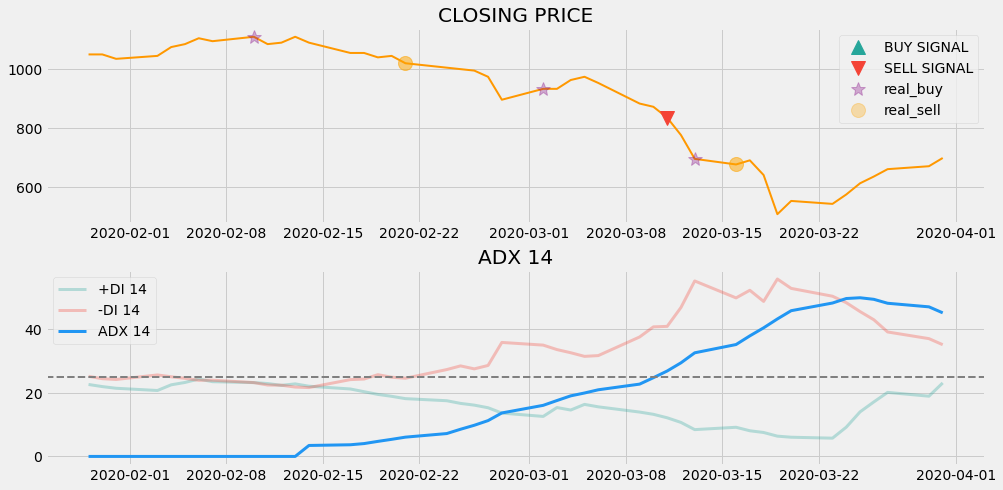

,Open,High,Low,Close,Volume,Change,ADX,PDI,MDI
Date,,,,,,,,,
2020-01-29,1050,1085,1035,1050,6222474,0.000000,0.000000,22.602892,25.161290
2020-01-30,1045,1080,1035,1050,3820993,0.000000,0.000000,21.940564,24.423994
2020-01-31,1045,1065,1030,1035,2905902,-0.014286,0.000000,21.414950,24.181119
2020-02-03,1015,1045,999,1045,3136006,0.009662,0.000000,20.712640,25.598210
2020-02-04,1045,1075,1045,1075,2645217,0.028708,0.000000,22.497787,25.021869
2020-02-05,1080,1090,1065,1085,2171983,0.009302,0.000000,23.240537,24.526298
2020-02-06,1085,1110,1080,1105,2945419,0.018433,0.000000,24.324281,23.914219
2020-02-07,1105,1110,1070,1095,1949721,-0.009050,0.000000,23.482791,23.951781
2020-02-10,1085,1115,1080,1110,2157491,0.013699,0.000000,23.192443,23.195631


In [ ]:
ADX_visualization('002360',14,plot = True)

In [ ]:
from ta.momentum import awesome_oscillator, kama, ppo

In [ ]:
def implement_adx_strategy(prices, pdi, ndi, adx):
  buy_price= []
  sell_price = [] 
  adx_signal = []
  signal = 0

  for i in range(len(prices)):
    if adx[i-1] < 25 and adx[i] > 25 and pdi[i] > ndi[i]:
      if signal != 1:
        buy_price.append(prices[i])
        sell_price.append(np.nan)
        singal =1
        adx_signal.append(signal)
      else:
        buy_price.append(np.nan)
        sell_price.append(np.nan)
        adx_signal.append(0)
    elif adx[i-1] <25 and adx[i] >25 and ndi[i] > pdi[i]:
      if signal != -1:
        buy_price.append(np.nan)
        sell_price.append(prices[i])
        signal = -1
        adx_signal.append(signal)
      else:
        buy_price.append(np.nan)
        sell_price.append(np.nan)
        adx_signal.append(0)
    else:
      buy_price.append(np.nan)
      sell_price.append(np.nan)
      adx_signal.append(0)
  
  return buy_price, sell_price, adx_signal

In [ ]:
def MOM_visualization(code, window1 =5, window2=14, plot = False):
  buy_date = pd.to_datetime(order_info[(order_info['상품번호'] == '00000A'+code) &
           (order_info['고객번호'] == 'C00010') &
           (order_info['매도매수구분코드']==2)]['주문일자'], format = '%Y%m%d')
  sell_date = pd.to_datetime(order_info[(order_info['상품번호'] == '00000A'+code) &
           (order_info['고객번호'] == 'C00010') &
           (order_info['매도매수구분코드']==1)]['주문일자'], format = '%Y%m%d')
  
  stock = fdr.DataReader('002360', '2020-01-05','2020-03-31')
  stock['awesome'] = awesome_oscillator(stock['High'], stock['Low'], window1=5, window2=14)
  stock['kama'] = kama(stock['Close'], window=14, pow1=2, pow2=30, fillna=False)
  stock['ppo'] = ppo(stock['Close'], window_slow=14, window_fast=5, window_sign=9)
  stock = stock.iloc[window+1:,:]
  
  buy_price, sell_price, adx_signal = implement_adx_strategy(stock['Close'], stock['PDI'],stock['MDI'], stock['ADX'])

  if plot == True:
    plt.figure(figsize=(15,7.5))
    ax1 = plt.subplot2grid((11,1),(0,0), rowspan = 5, colspan=1)
    ax2 = plt.subplot2grid((11,1),(6,0), rowspan = 5, colspan=1)
    ax1.plot(stock['Close'], linewidth =2, color = '#ff9800')
    ax1.set_title('CLOSING PRICE')
    ax1.plot(stock.index, buy_price, marker = '^', color = '#26a69a', markersize =14, linewidth = 0 , label = 'BUY SIGNAL')
    ax1.plot(stock.index, sell_price, marker = 'v', color = '#f44336', markersize =14, linewidth = 0 , label = 'SELL SIGNAL')
    ax1.plot(stock.loc[buy_date,'Close'] , marker = '*', color = 'purple',markersize =14, linewidth = 0, label = 'real_buy', alpha = 0.3)
    ax1.plot(stock.loc[sell_date,'Close'] , marker = 'o', color = 'orange',markersize =14, linewidth = 0, label = 'real_sell', alpha = 0.3)
    ax1.legend()

    ax2.plot(stock['PDI'], linewidth =3, color = '#26a69a', label = '+DI '+str(window), alpha =0.3)
    ax2.plot(stock['MDI'], linewidth =3, color = '#f44336', label = '-DI '+str(window), alpha =0.3)
    ax2.plot(stock['ADX'], linewidth =3, color = '#2196f3', label = 'ADX '+str(window))
    ax2.axhline(25, color = 'grey', linewidth=2, linestyle = '--')
    ax2.legend()
    ax2.set_title('ADX '+str(window))
    plt.show()


  return stock

In [ ]:
stock = fdr.DataReader('002360', '2020-01-20','2020-03-31')
stock['awesome'] = awesome_oscillator(stock['High'], stock['Low'], window1=5, window2=14)
stock['kama'] = kama(stock['Close'], window=14, pow1=2, pow2=5, fillna=False)
stock['ppo'] = ppo(stock['Close'], window_slow=14, window_fast=5, window_sign=9)

In [ ]:
stock

,Open,High,Low,Close,Volume,Change,awesome,kama,ppo
Date,,,,,,,,,
2020-01-20,1125,1155,1115,1125,7331579,0.004464,NaN,NaN,NaN
2020-01-21,1125,1230,1100,1145,51154874,0.017778,NaN,NaN,NaN
2020-01-22,1140,1145,1100,1105,11985195,-0.034934,NaN,NaN,NaN
2020-01-23,1105,1135,1090,1090,10709583,-0.013575,NaN,NaN,NaN
2020-01-28,1070,1075,1025,1050,7589676,-0.036697,NaN,NaN,NaN
2020-01-29,1050,1085,1035,1050,6222474,0.000000,NaN,NaN,NaN
2020-01-30,1045,1080,1035,1050,3820993,0.000000,NaN,NaN,NaN
2020-01-31,1045,1065,1030,1035,2905902,-0.014286,NaN,NaN,NaN
2020-02-03,1015,1045,999,1045,3136006,0.009662,NaN,NaN,NaN


#MACD

In [ ]:

import requests
import pandas as pd
import numpy as np
from math import floor
from termcolor import colored as cl
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('fivethirtyeight')

In [ ]:
def get_macd(price, slow, fast, smooth):
    exp1 = price.ewm(span = fast, adjust = False).mean()
    exp2 = price.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1 - exp2).rename(columns = {'Close':'macd'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'macd':'signal'})
    hist = pd.DataFrame(macd['macd'] - signal['signal']).rename(columns = {0:'hist'})
    frames =  [macd, signal, hist]
    df = pd.concat(frames, join = 'inner', axis = 1)
    return df

kodex200_macd = get_macd(stock['Close'], 26, 12, 9)
kodex200_macd.tail()

,macd,signal,hist
Date,,,
2020-03-25,-121.105151,-104.973328,-16.131823
2020-03-26,-114.432914,-106.865245,-7.567669
2020-03-27,-105.906996,-106.673596,0.766599
2020-03-30,-97.222509,-104.783378,7.560870
2020-03-31,-87.076855,-101.242074,14.165218


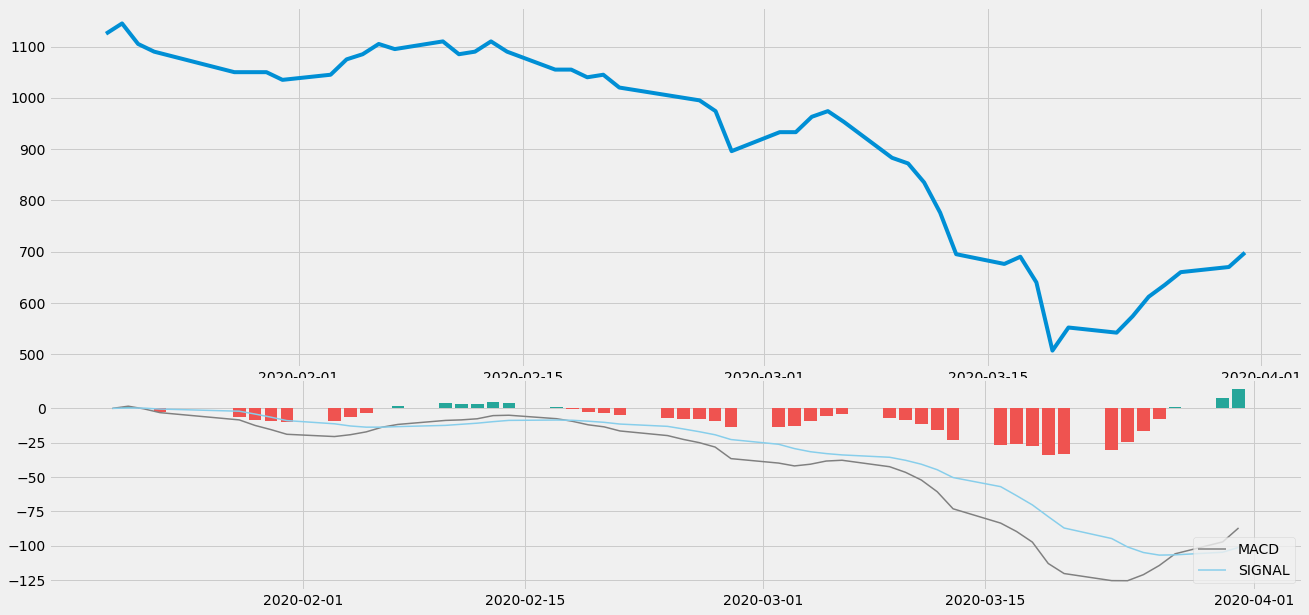

In [ ]:

def plot_macd(prices, macd, signal, hist):
    ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)

    ax1.plot(prices)
    ax2.plot(macd, color = 'grey', linewidth = 1.5, label = 'MACD')
    ax2.plot(signal, color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color = '#26a69a')

    plt.legend(loc = 'lower right')

plot_macd(stock['Close'], kodex200_macd['macd'], kodex200_macd['signal'], kodex200_macd['hist'])

In [ ]:
def implement_macd_strategy(prices, data):    
    buy_price = []
    sell_price = []
    macd_signal = []
    signal = 0

    for i in range(len(data)):
        if data['macd'][i] > data['signal'][i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        elif data['macd'][i] < data['signal'][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            macd_signal.append(0)
            
    return buy_price, sell_price, macd_signal
            
buy_price, sell_price, macd_signal = implement_macd_strategy(stock['Close'], kodex200_macd)

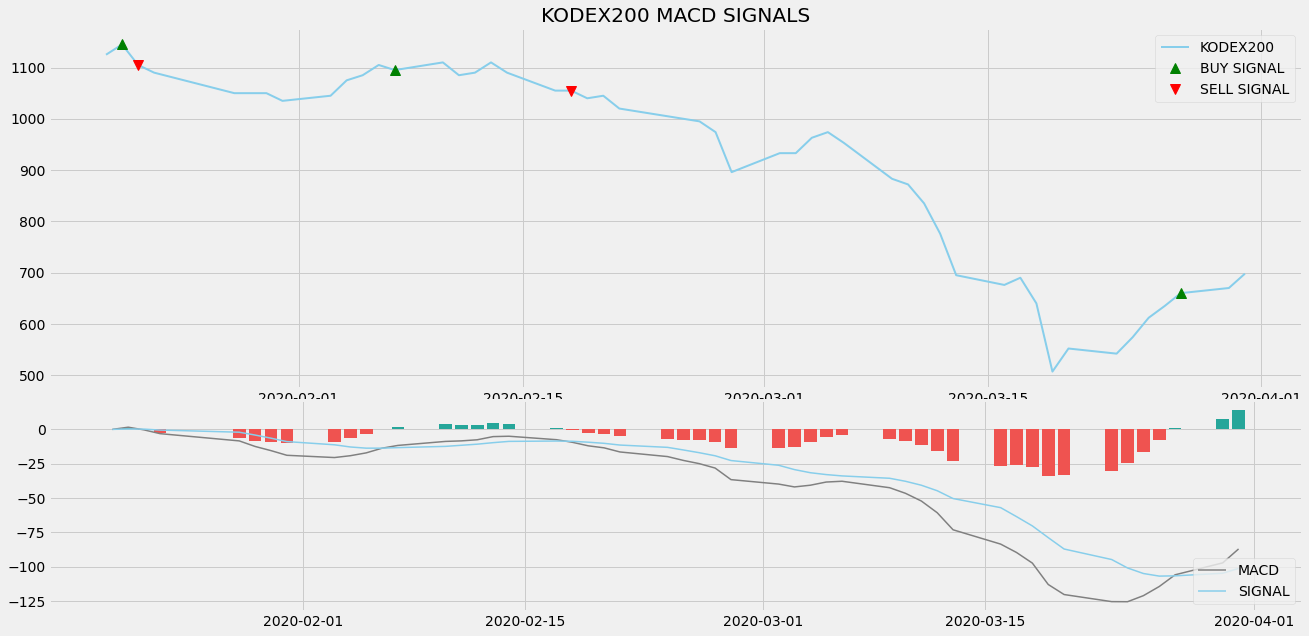

In [ ]:
ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)

ax1.plot(stock['Close'], color = 'skyblue', linewidth = 2, label = 'KODEX200')
ax1.plot(stock.index, buy_price, marker = '^', color = 'green', markersize = 10, label = 'BUY SIGNAL', linewidth = 0)
ax1.plot(stock.index, sell_price, marker = 'v', color = 'r', markersize = 10, label = 'SELL SIGNAL', linewidth = 0)
ax1.legend()
ax1.set_title('KODEX200 MACD SIGNALS')
ax2.plot(kodex200_macd['macd'], color = 'grey', linewidth = 1.5, label = 'MACD')
ax2.plot(kodex200_macd['signal'], color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

for i in range(len(kodex200_macd)):
    if str(kodex200_macd['hist'][i])[0] == '-':
        ax2.bar(kodex200_macd.index[i], kodex200_macd['hist'][i], color = '#ef5350')
    else:
        ax2.bar(kodex200_macd.index[i], kodex200_macd['hist'][i], color = '#26a69a')
        
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
stock[stock['Close']==buy_price].index

DatetimeIndex(['2020-01-21', '2020-02-07', '2020-03-27'], dtype='datetime64[ns]', name='Date', freq=None)

In [ ]:
stock[stock['Close']==sell_price].index

DatetimeIndex(['2020-01-22', '2020-02-18'], dtype='datetime64[ns]', name='Date', freq=None)

#RSI

In [ ]:
# RSI = 100 - 100/(1 + Avg Gain/Avg Loss)
# Using n = 14 days

def RSI(data, window=14, adjust=False):
    delta = stock['Close'].diff(1).dropna()
    loss = delta.copy()
    gains = delta.copy()

    gains[gains<0] = 0
    loss[loss>0] = 0

    gain_ewm = gains.ewm(com=window-1, adjust=adjust).mean()
    loss_ewm = abs(loss.ewm(com=window-1, adjust=adjust).mean())

    RS = gain_ewm / loss_ewm
    RSI = 100 - 100/(1 + RS)
    
    return RSI

In [ ]:
rsi = RSI(stock)

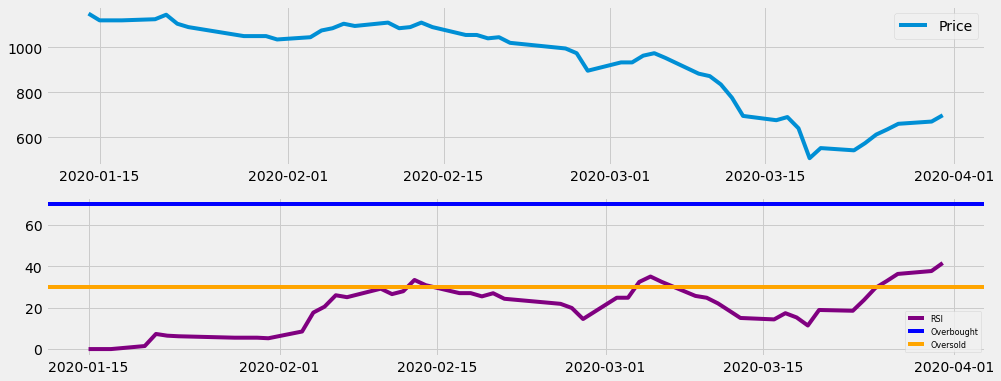

In [ ]:

fig, ax = plt.subplots(2, 1, figsize=(15, 6))
ax[0].plot(stock['Close'][-500:], label='Price')
ax[1].plot(rsi[-500:], label='RSI', c='purple')
ax[1].axhline(y=70, c='blue', label='Overbought')
ax[1].axhline(y=30, c='orange', label='Oversold')
ax[0].legend()
ax[1].legend(loc='lower right', fontsize=8)

In [ ]:

stock = stock[1:]
stock['RSI'] = rsi
stock['sell_points'] = np.where((rsi > 20) & (rsi.shift(1) <= 20), 1, 0)
stock['buy_points'] = np.where((rsi < 15) & (rsi.shift(1) >= 15), 1, 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

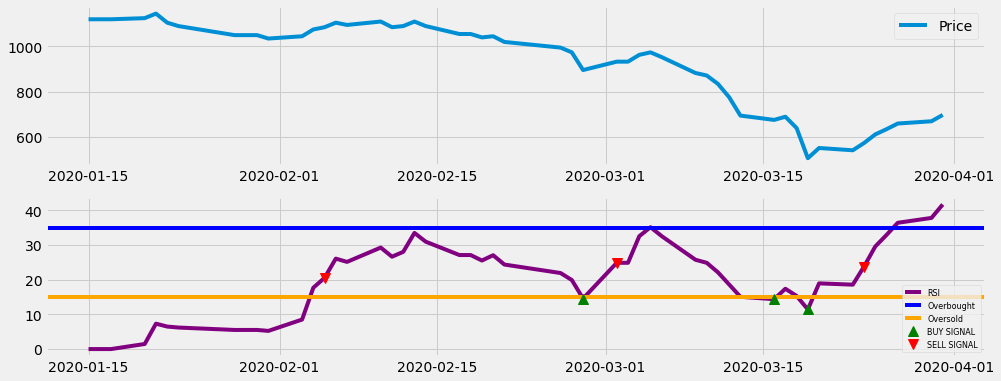

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(15, 6))
ax[0].plot(stock['Close'][-500:], label='Price')
ax[1].plot(rsi[-500:], label='RSI', c='purple')
ax[1].axhline(y=35, c='blue', label='Overbought')
ax[1].axhline(y=15, c='orange', label='Oversold')
ax[0].legend()


# ax[1].scatter(stock[stock['buy_points'] == 1][-5:].index, 
#               stock[stock['buy_points'] == 1]['RSI'][-5:],
#              c = 'green')

# ax[1].scatter(stock[stock['sell_points'] == 1][-16:].index, 
#               stock[stock['sell_points'] == 1]['RSI'][-16:],
#               c = 'red')

ax[1].plot(stock[stock['buy_points'] == 1][-5:].index, stock[stock['buy_points'] == 1]['RSI'][-5:], marker = '^', color = 'green', markersize = 10, label = 'BUY SIGNAL', linewidth = 0)
ax[1].plot(stock[stock['sell_points'] == 1][-14:].index, stock[stock['sell_points'] == 1]['RSI'][-14:], marker = 'v', color = 'r', markersize = 10, label = 'SELL SIGNAL', linewidth = 0)

ax[1].legend(loc='lower right', fontsize=8)